In [340]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [341]:
df = pd.read_csv('Boston.csv')

In [342]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [343]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [344]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Correlación variables

<Axes: >

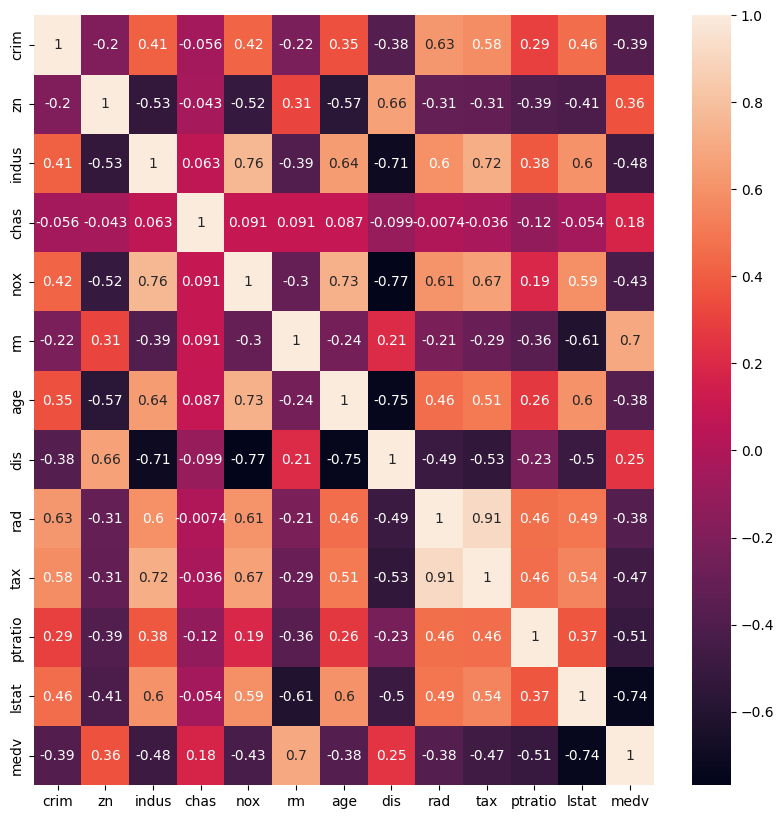

In [345]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [346]:
target = 'medv'
y = df[target]

In [347]:
df = pd.get_dummies(df,columns=['rad'])

In [348]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


In [349]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

# Analisis Bivariado

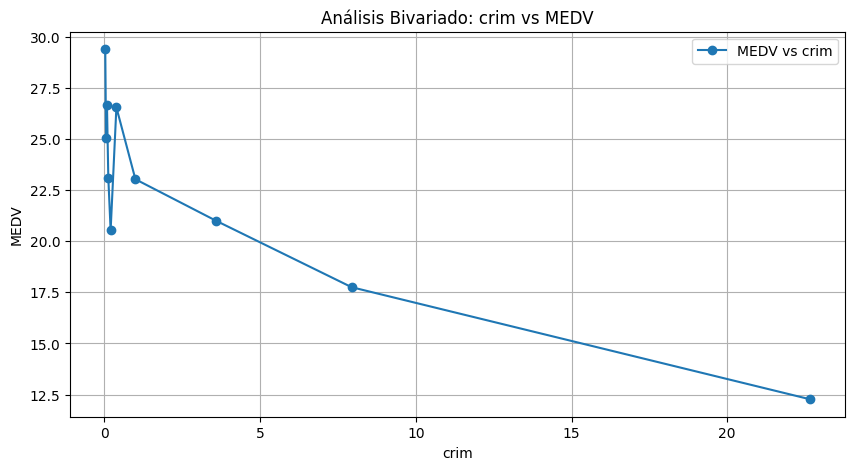

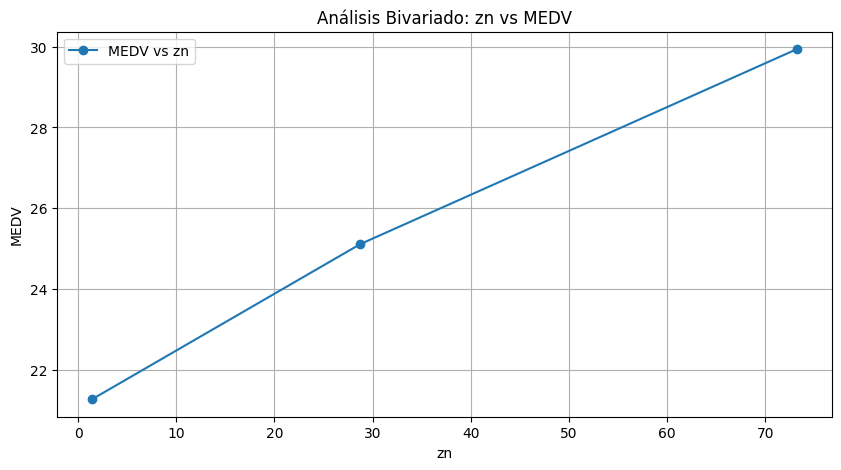

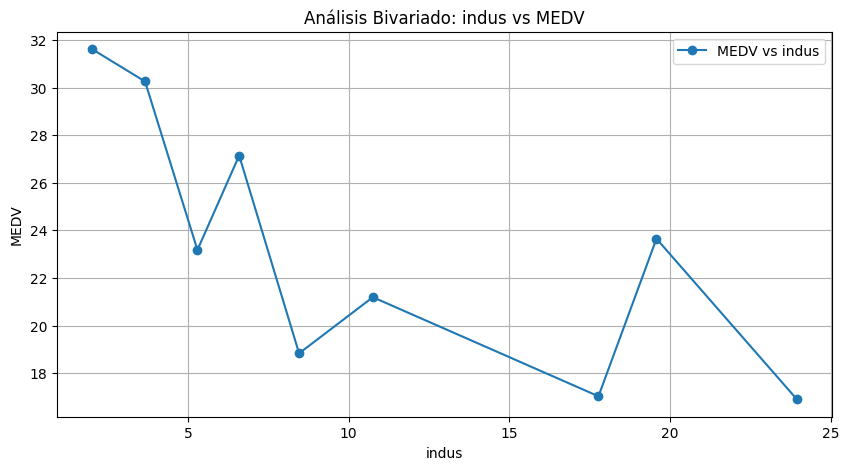

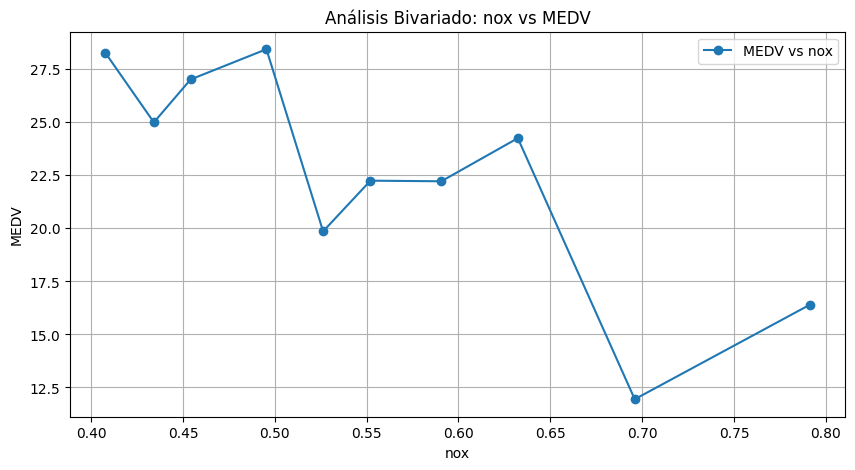

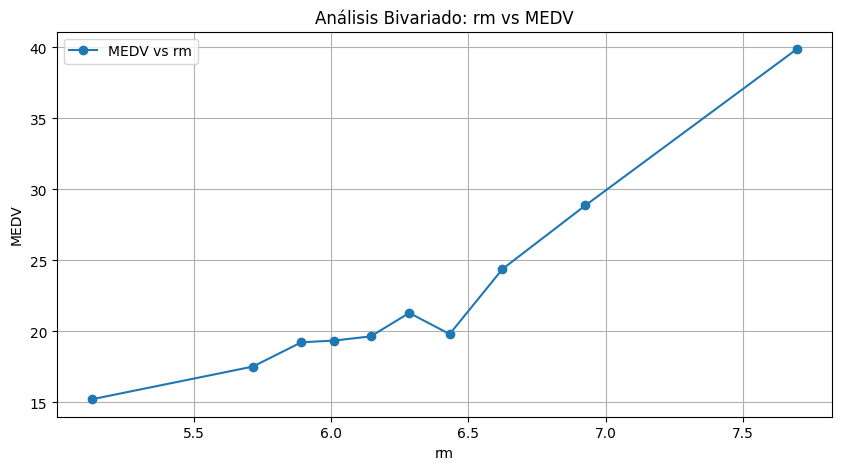

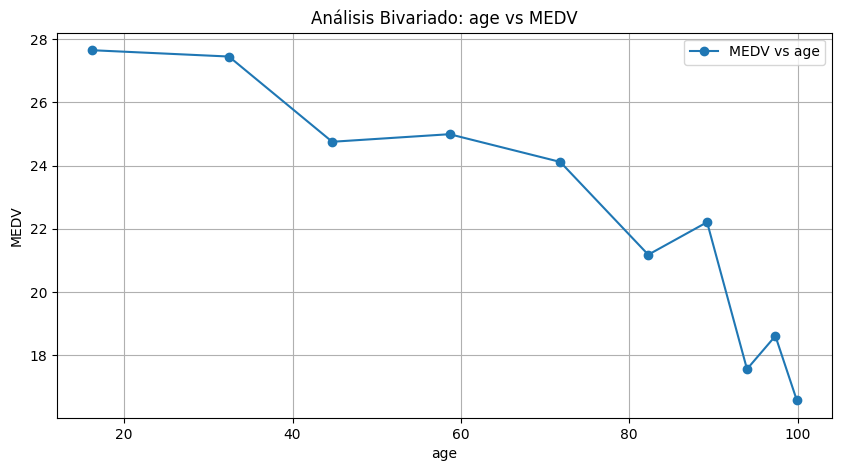

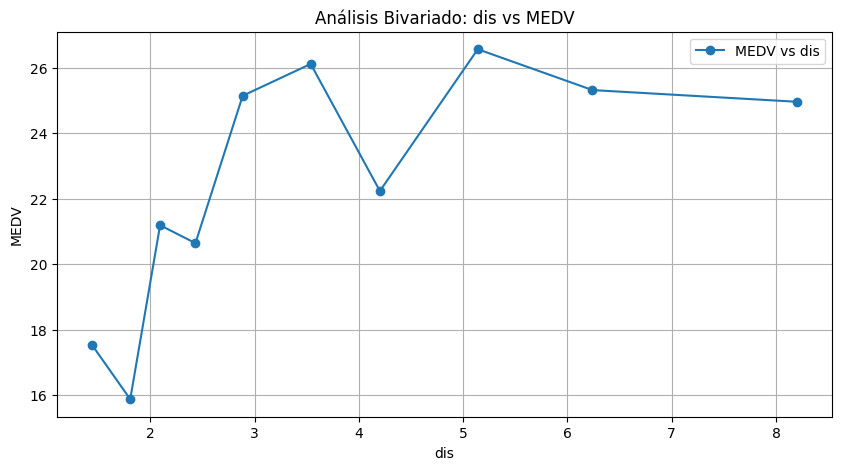

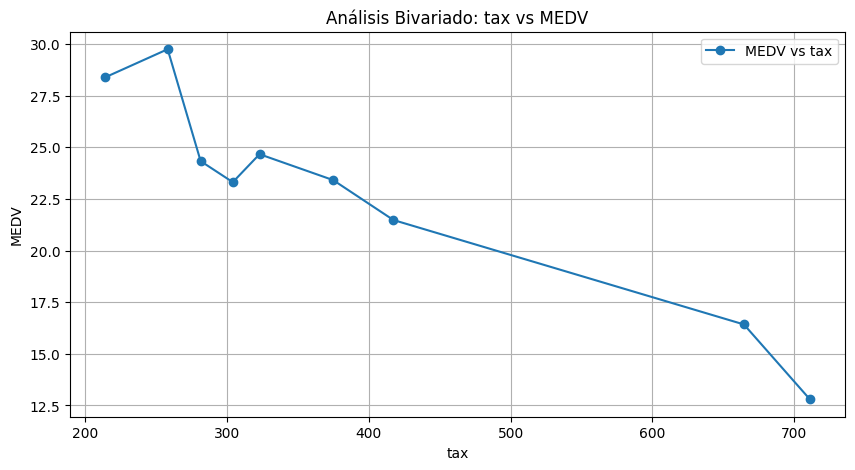

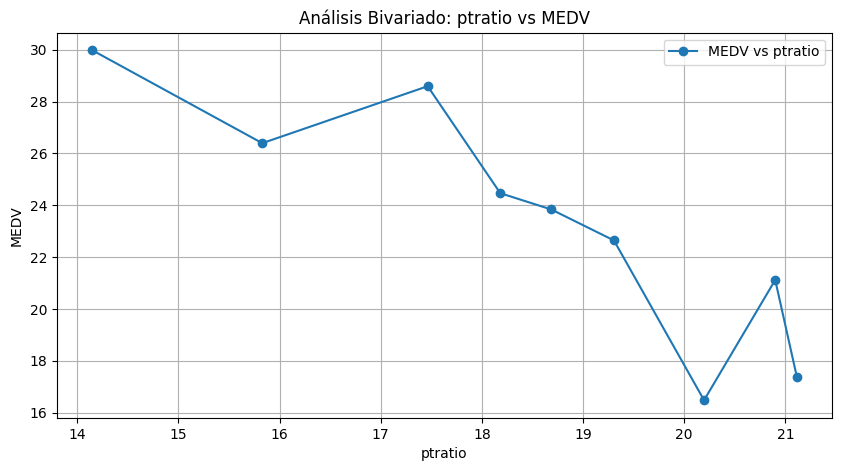

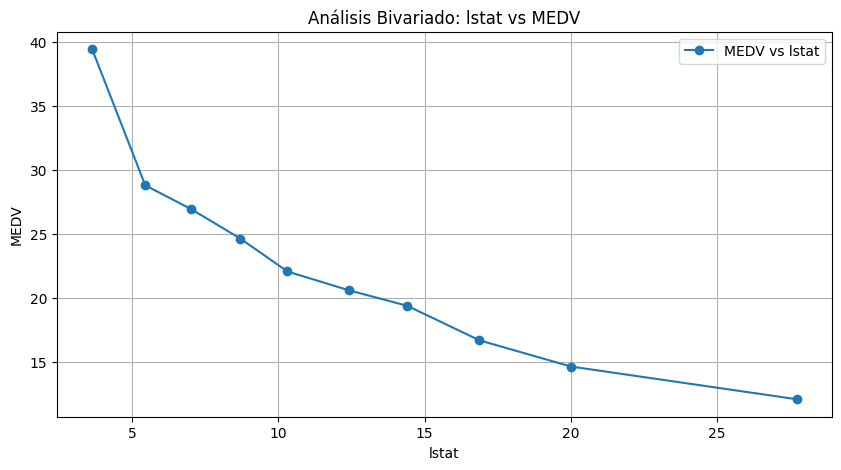

In [350]:
variables = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']

for i in variables:
    variable_bin = f'{i}_bin'
    df[variable_bin] = pd.qcut(df[i], q=10, labels=False, duplicates='drop') + 1
    grouped = df.groupby(variable_bin).mean()
    plt.figure(figsize=(10, 5))
    plt.plot(grouped[i].values, grouped[target].values, marker="o", label=f'MEDV vs {i}')
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.title(f'Análisis Bivariado: {i} vs MEDV')
    plt.legend()
    plt.grid()
    plt.show()
    df.drop(columns=[variable_bin], inplace=True)




In [351]:

df.head()


,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


In [352]:
X = df.copy()
X = X.drop(target, axis=1)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,lstat,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,4.98,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,9.14,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,4.03,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,2.94,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,5.33,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,9.67,True,False,False,False,False,False,False,False,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,9.08,True,False,False,False,False,False,False,False,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,5.64,True,False,False,False,False,False,False,False,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,6.48,True,False,False,False,False,False,False,False,False


# RLM con todas las variables 

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)

model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.7211432830626587

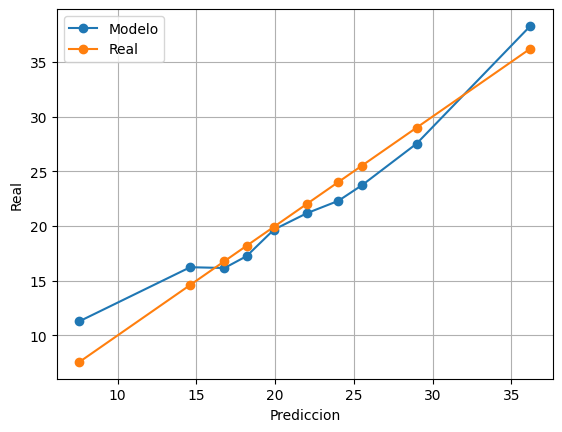

In [354]:
calibracion(predicciones_lineal, y_test, 10)

# Polinomial Grado 2 con todas las variables

In [355]:
degree = 2

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8121940246948067

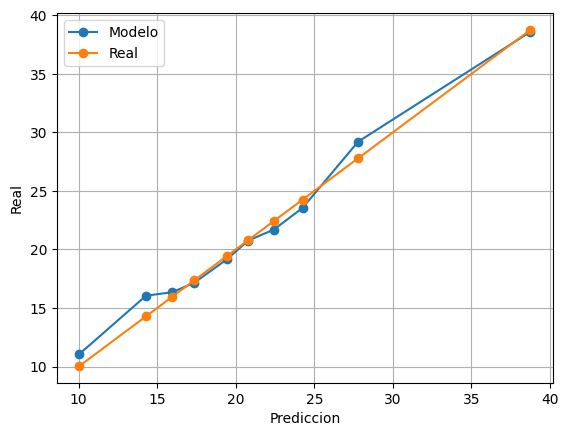

In [356]:
calibracion(predicciones_poly2, y_test, 10)

# Polinomial Grado 3 con todas las variables

In [357]:
degree = 3

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.728675493313274

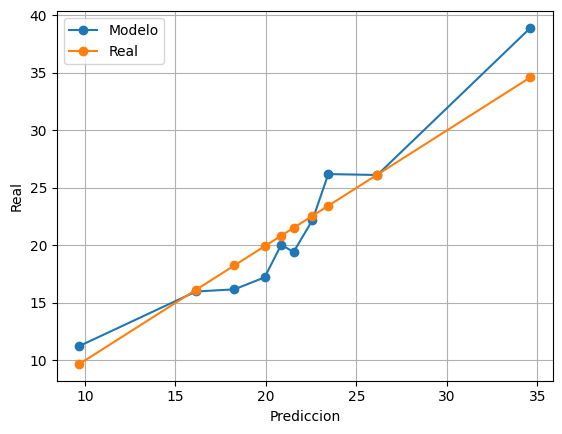

In [358]:
calibracion(predicciones_poly3, y_test, 10)

In [359]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


# Revisar la significancia de las variables

In [360]:
result = smf.ols('medv ~ ' + '+'.join(df.columns.drop(['medv', 'indus', 'age', 'rad_1', 'rad_6','rad_2'])), data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.7323,5.082,8.212,0.000,31.747,51.718
rad_3[T.True],3.6712,0.988,3.716,0.000,1.730,5.613
rad_4[T.True],1.6252,0.758,2.143,0.033,0.135,3.115
rad_5[T.True],1.8333,0.768,2.386,0.017,0.324,3.343
rad_7[T.True],3.9458,1.317,2.995,0.003,1.358,6.534
rad_8[T.True],3.7931,1.173,3.233,0.001,1.488,6.098
rad_24[T.True],6.0159,1.434,4.195,0.000,3.198,8.834
crim,-0.1233,0.033,-3.769,0.000,-0.188,-0.059
zn,0.0533,0.014,3.816,0.000,0.026,0.081
chas,2.6619,0.863,3.085,0.002,0.967,4.357


In [361]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


In [362]:
X_multiple = df[['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat', 'rad_3', 'rad_4', 'rad_5', 'rad_7', 'rad_8', 'rad_24']]

In [363]:
scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)

# RLM con las variables significantes

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)

model = linear_model.Ridge().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.7238173788011175

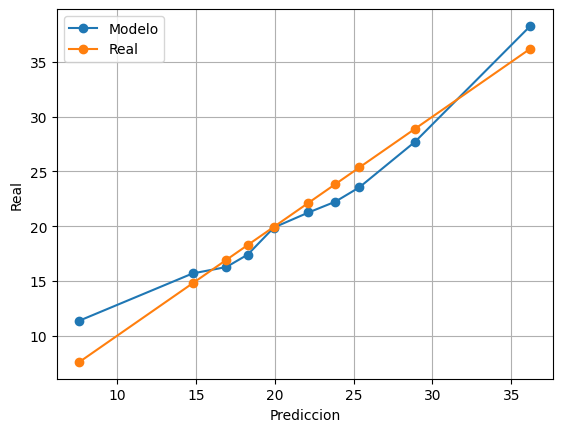

In [365]:
calibracion(predicciones_lineal, y_test, 10)

# Polinomial Grado 2 con las variables significantes

In [366]:
degree = 2

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8107558114121797

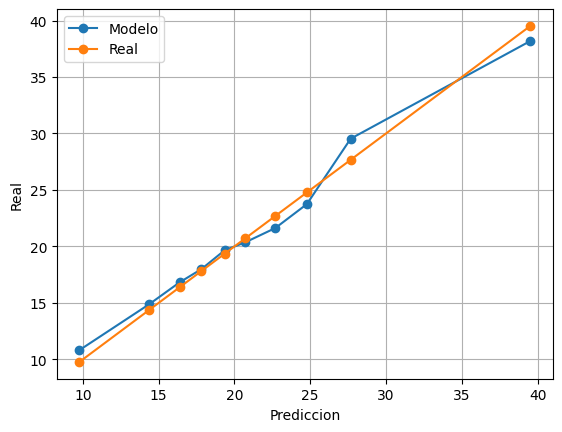

In [367]:
calibracion(predicciones_poly2, y_test, 10)

# Polinomial Grado 3 con las variables significantes

In [368]:
degree = 3

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.7688308046927306

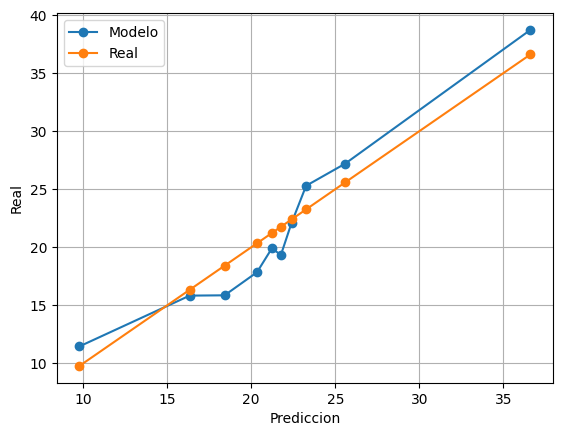

In [369]:
calibracion(predicciones_poly3, y_test, 10)

# Feature Eng

In [370]:
X = df.copy().drop(target, axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,lstat,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,4.98,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,9.14,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,4.03,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,2.94,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,5.33,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,9.67,True,False,False,False,False,False,False,False,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,9.08,True,False,False,False,False,False,False,False,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,5.64,True,False,False,False,False,False,False,False,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,6.48,True,False,False,False,False,False,False,False,False


In [371]:
X['tax_per_indus'] = X['tax'] / (X['indus'] + 1)
X['nox_per_indus'] = X['nox'] / (X['indus'] + 1)
X['tax_per_nox'] = X['tax'] / (X['nox'] + 1)
X['age_per_nox'] = X['age'] / (X['nox'] + 1)
X['age_per_indus'] = X['age'] / (X['indus'] + 1)
X['zn_per_dis'] = X['zn'] / (X['dis'] + 1)
X['lstat_per_rm'] = X['lstat'] / (X['rm'] + 1)
X['crim_per_age'] = X['crim'] / (X['age'] + 1)
X['crim_per_tax'] = X['crim'] / (X['tax'] + 1)
X['lstat_per_indus'] = X['lstat'] / (X['indus'] + 1)
X['lstat_per_tax'] = X['lstat'] / (X['tax'] + 1)
X['indus_per_zn'] = X['indus'] / (X['zn'] + 1)
X['nox_per_zn'] = X['nox'] / (X['zn'] + 1)
X['lstat_per_age'] = X['lstat'] / (X['age'] + 1)
X['tax_per_dis'] = X['tax'] / (X['dis'] + 1)
X['dis_per_age'] = X['dis'] / (X['age'] + 1)
X['ptratio_per_tax'] = X['ptratio'] / (X['tax'] + 1)
X['age_per_zn'] = X['age'] / (X['zn'] + 1)
X['rn_per_zn'] = X['rm'] / (X['zn'] + 1)
X['rn_per_indus'] = X['rm'] / (X['indus'] + 1)
X['crim_per_lstat'] = X['crim'] / (X['lstat'] + 1)
X['crim_per_dis'] = X['crim'] / (X['dis'] + 1)
X['crim_per_indus'] = X['crim'] / (X['indus'] + 1)

In [372]:
X['log_lstat']=np.log(X['lstat'] + 1)
X['sqrt_age'] = np.sqrt(X['age'] + 1)
X['sqrt_ptratio'] = np.sqrt(X['ptratio'] + 1)
X['log_crim'] = np.log(X['crim'] + 1)
X['sqrt_nox'] = np.sqrt(X['nox'] + 1)

In [373]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = linear_model.Ridge().fit(X_train, y_train)

predicciones_lineal = model.predict(X_test)
r2_score(y_true=y_test, y_pred=predicciones_lineal)

0.8106954458896333

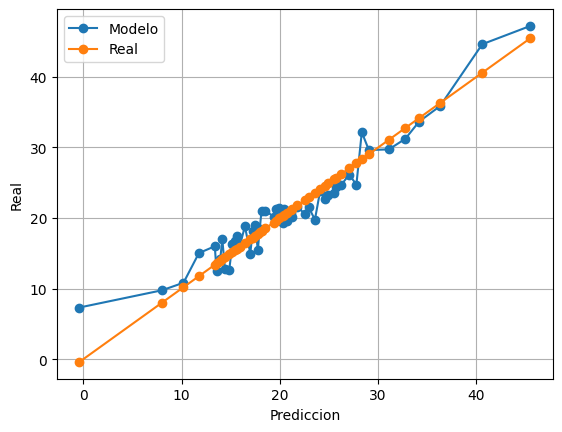

In [374]:
calibracion(predicciones_lineal, y_test, 50)


In [375]:
degree = 2

# Aplicar StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly2_fe, y_true=y_test)

0.6625909243736317

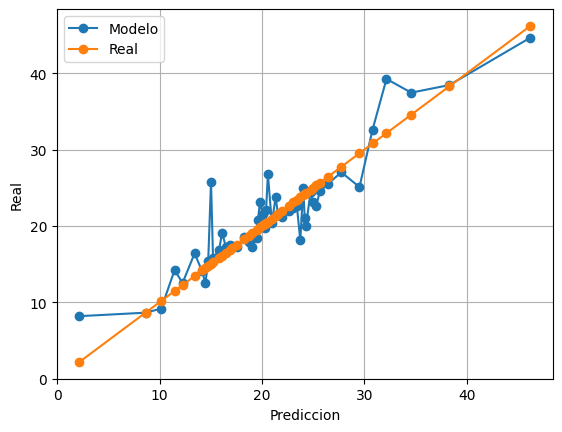

In [376]:
calibracion(predicciones_poly2_fe, y_test, bins=50)

In [377]:

degree = 3

# Aplicar StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly3_fe, y_true=y_test)

0.772693077850155

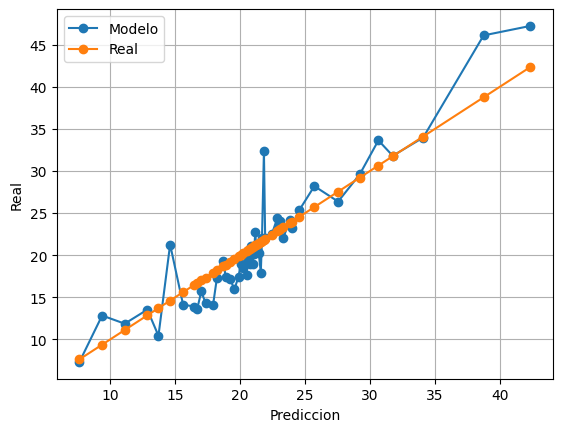

In [378]:
calibracion(predicciones_poly3_fe, y_test, bins=50)

In [379]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'lstat', 'rad_1', 'rad_2', 'rad_3', 'rad_4', 'rad_5',
       'rad_6', 'rad_7', 'rad_8', 'rad_24', 'tax_per_indus', 'nox_per_indus',
       'tax_per_nox', 'age_per_nox', 'age_per_indus', 'zn_per_dis',
       'lstat_per_rm', 'crim_per_age', 'crim_per_tax', 'lstat_per_indus',
       'lstat_per_tax', 'indus_per_zn', 'nox_per_zn', 'lstat_per_age',
       'tax_per_dis', 'dis_per_age', 'ptratio_per_tax', 'age_per_zn',
       'rn_per_zn', 'rn_per_indus', 'crim_per_lstat', 'crim_per_dis',
       'crim_per_indus', 'log_lstat', 'sqrt_age', 'sqrt_ptratio', 'log_crim',
       'sqrt_nox'],
      dtype='object')

In [380]:
X_FE = X[['tax_per_indus', 'nox_per_indus', 'tax_per_nox', 'age_per_nox', 'age_per_indus', 'zn_per_dis', 'lstat_per_rm', 'crim_per_age', 'crim_per_tax', 'lstat_per_indus', 'lstat_per_tax', 'indus_per_zn', 'nox_per_zn', 'lstat_per_age', 'tax_per_dis', 'dis_per_age', 'ptratio_per_tax', 'age_per_zn', 'rn_per_zn', 'rn_per_indus', 'crim_per_lstat', 'crim_per_dis', 'crim_per_indus', 'log_lstat', 'sqrt_age', 'sqrt_ptratio', 'log_crim', 'sqrt_nox']]
X_FE

,tax_per_indus,nox_per_indus,tax_per_nox,age_per_nox,age_per_indus,zn_per_dis,lstat_per_rm,crim_per_age,crim_per_tax,lstat_per_indus,...,rn_per_zn,rn_per_indus,crim_per_lstat,crim_per_dis,crim_per_indus,log_lstat,sqrt_age,sqrt_ptratio,log_crim,sqrt_nox
0,89.425982,0.162538,192.457737,42.392718,19.697885,3.536346,0.657426,0.000095,0.000021,1.504532,...,0.346053,1.986405,0.001057,0.001242,0.001909,1.788421,8.136338,4.037326,0.006300,1.240161
1,29.987608,0.058116,164.737917,53.710007,9.776952,0.000000,1.231640,0.000342,0.000112,1.132590,...,6.421000,0.795663,0.002693,0.004577,0.003384,2.316488,8.938680,4.335897,0.026944,1.212023
2,29.987608,0.058116,164.737917,41.592920,7.571252,0.000000,0.492364,0.000439,0.000112,0.499380,...,7.185000,0.890335,0.005425,0.004573,0.003382,1.615420,7.880355,4.335897,0.026924,1.212023
3,69.811321,0.144025,152.263374,31.412894,14.402516,0.000000,0.367592,0.000692,0.000145,0.924528,...,6.998000,2.200629,0.008216,0.004584,0.010179,1.371181,6.841053,4.438468,0.031857,1.207477
4,69.811321,0.144025,152.263374,37.174211,17.044025,0.000000,0.654229,0.001251,0.000310,1.676101,...,7.147000,2.247484,0.010908,0.009777,0.021714,1.845300,7.429670,4.438468,0.066770,1.207477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.113689,0.044316,173.553719,43.928798,5.344161,0.000000,1.273541,0.000893,0.000229,0.747873,...,6.593000,0.509899,0.005870,0.018004,0.004844,2.367436,8.372574,4.690416,0.060747,1.254193
502,21.113689,0.044316,173.553719,48.760331,5.931941,0.000000,1.275281,0.000583,0.000165,0.702243,...,6.120000,0.473318,0.004491,0.013770,0.003501,2.310553,8.814760,4.690416,0.044275,1.254193
503,21.113689,0.044316,173.553719,57.851240,7.037896,0.000000,0.707121,0.000660,0.000222,0.436195,...,6.976000,0.539520,0.009151,0.019182,0.004699,1.893112,9.591663,4.690416,0.058986,1.254193
504,21.113689,0.044316,173.553719,56.770502,6.906419,0.000000,0.831409,0.001214,0.000400,0.501160,...,6.794000,0.525445,0.014651,0.032338,0.008476,2.012233,9.502631,4.690416,0.103991,1.254193


In [381]:
X_FE = X_FE.join(y)
result = smf.ols('medv ~ ' + '+'.join(X_FE.columns), data=X_FE).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.386e-13,2.89e-13,0.479,0.632,-4.3e-13,7.07e-13
tax_per_indus,-6.835e-16,3.83e-16,-1.783,0.075,-1.44e-15,6.96e-17
nox_per_indus,4.743e-13,5.3e-13,0.895,0.371,-5.67e-13,1.52e-12
tax_per_nox,1.691e-16,1.43e-16,1.185,0.236,-1.11e-16,4.5e-16
age_per_nox,-2.574e-15,2.01e-15,-1.283,0.200,-6.52e-15,1.37e-15
age_per_indus,1.554e-15,1.94e-15,0.801,0.423,-2.26e-15,5.37e-15
zn_per_dis,4.337e-16,1.49e-15,0.291,0.771,-2.5e-15,3.37e-15
lstat_per_rm,3.886e-16,7.54e-15,0.052,0.959,-1.44e-14,1.52e-14
crim_per_age,-9.237e-14,2.41e-13,-0.383,0.702,-5.66e-13,3.81e-13
crim_per_tax,1.705e-12,5.58e-12,0.305,0.760,-9.27e-12,1.27e-11


In [382]:
scaler = StandardScaler().fit(X_FE)
X_scaled = scaler.transform(X_FE)
X_train, X_test, y_train, y_test = train_test_split(X_FE, y, test_size=0.3, random_state=42)

model = linear_model.Ridge().fit(X_train, y_train)

predicciones_lineal = model.predict(X_test)
r2_score(y_true=y_test, y_pred=predicciones_lineal)

0.9999999939149229

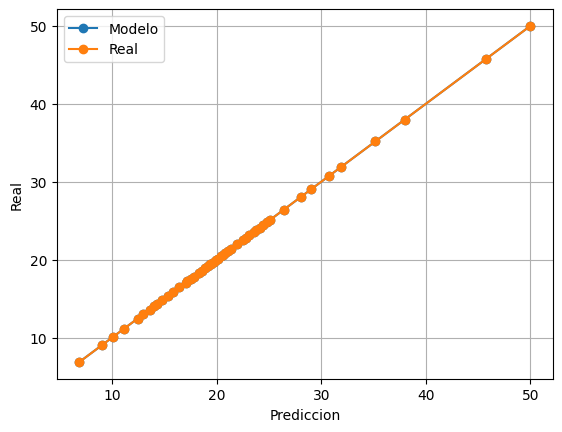

In [383]:
calibracion(predicciones_lineal, y_test, 50)

In [384]:
degree = 2

# Aplicar StandardScaler

scaler = StandardScaler().fit(X_FE)
X_scaled = scaler.transform(X_FE)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly2_fe, y_true=y_test)

0.9989204853650124

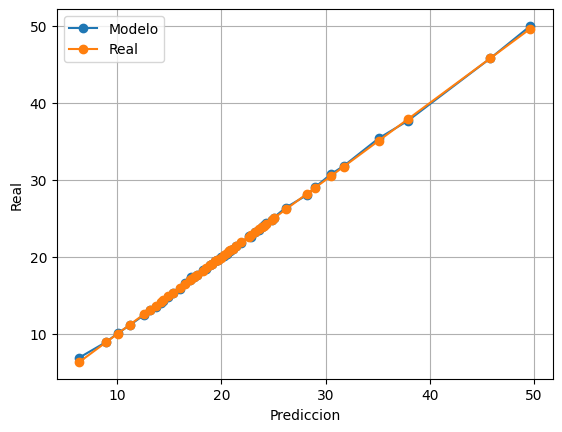

In [385]:
calibracion(predicciones_poly2_fe, y_test, bins=50)

In [386]:
degree = 3

# Aplicar StandardScaler

scaler = StandardScaler().fit(X_FE)
X_scaled = scaler.transform(X_FE)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly3_fe, y_true=y_test)

0.9522458680128696

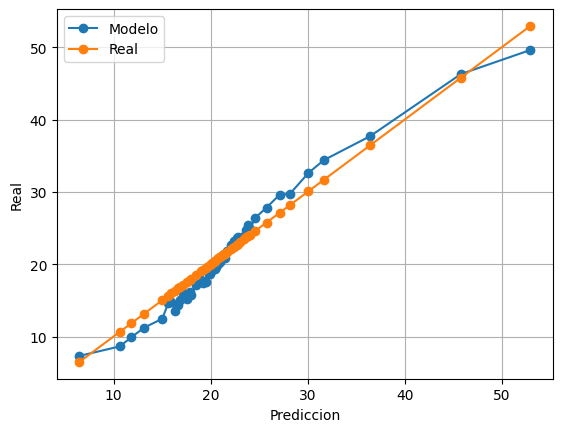

In [387]:
calibracion(predicciones_poly3_fe, y_test, bins=50)